# Data analysis in Python



# Python 101

This part describes the basic concepts of working with python and should give an overview of the syntax. We'll cover:

* Variables
* Printing results
* Control flow
* Functions

For further details, please see the **Resources** section bellow.

In its most basic form, a Python program is a text file containing a sequence of operations. It can be thought as a recipe to organise a list of tasks for a computer.

The following program simply add `1` to `1`, then multiplies `3` by `0.5`.

In [0]:
1+1
3*0.5
# This is a comment, it is ignored at runtime

1.5

## Variables

Used to store values of any type (integer, strings, list)

In [0]:
a = 1
b = "Hello world"
c = 10
d = [1, 23, 5]

## Print

The print function is used to display the value of an expression or a variable in the output

In [0]:
# What will this print ?
print("Hi!")
print(42)

Hi!
42


In [0]:
# What will this print ?
print(a)

1


In [0]:
# What will this print ?
print(a + c)

11


In [0]:
a = 1
b = "Hello world"
c = 10
d = [1, 23, 5]

# What about this ?
print(a + b)

TypeError: ignored

In [0]:
d = [1, 23, 5]
print(d[1])

23


## Control flow

Allows to control the order in which the lines in a python program will be executed.

* Conditions (`if` ... `else`)
* Loops (`for`)

In [0]:
# What will this print ?
data_lunch_number = 37

if data_lunch_number > 36:
  print("Machine Learning Bootcamp")
else:
  print("Another data lunch")

Machine Learning Bootcamp


In [0]:
for greeting in ["Hello", "Goodbye"]:
  print(greeting + " Data Lunch")

Hello Data Lunch
Goodbye Data Lunch


## Functions

Allows to package a sequence of operation in a re-usable function.

In [0]:
def square(x):
  return x * x

print(square(2))

4


Some functions are built-in and provided with Python

In [0]:
my_list = [1, 2, 3]

for result in map(square, my_list):
  print(result)

1
4
9


## Objects

Objects allow to represent complex structures. An object has attributes (variables specific to this object) and functions.

We could compare Python objects to actual objects like cars as they have attributes (color, engine type...) and functions (start engine, open doors...).

In [0]:
class Counter(object):
  
  def __init__(self):
    self.value = 0
  
  def increment(self):
    self.value = self.value + 1

In [0]:
# What will this print ?
counter = Counter()
counter.increment()
counter.increment()
print(counter.value)

2


## Resources

Getting started with Python (interactive): https://www.learnpython.org/en/Welcome




# Manipulate structured data

This part describes working with tables of data.

## Install pandas module

A module in Python is a third party library that bring additional functionalities to Python. We will be loading `pandas` as it is the standard library to manipulate data and `numpy` for algebra.

In [0]:
import pandas as pd
import numpy as np

## Load datasets

For this example we will be loading two datasets from London city:

* https://github.com/datasets/london-crime
* https://github.com/datasets/london-air-quality

We will try to see if there is any correlation between these datasets.

To import data we use the `read_csv` function that imports a CSV file as a DataFrame (equivalent to a table). We are saving datasets in the variables `crimes` and `air_quality`.

In [0]:
crimes = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/london-crime/master/data/crime-rates.csv"
)
air_quality = pd.read_csv(
    "https://raw.githubusercontent.com/datasets/london-air-quality/master/data/monthly-averages.csv"
)

## Explore data

First, let's print the first 10 values of each dataset.

In [0]:
# The crimes dataset
crimes.head(5)

,Code,Borough,Year,Value
0,E09000002,Barking and Dagenham,1999-12-31,120.453818
1,E09000002,Barking and Dagenham,2000-12-31,123.574527
2,E09000002,Barking and Dagenham,2001-12-31,123.981310
3,E09000002,Barking and Dagenham,2002-12-31,122.591776
4,E09000002,Barking and Dagenham,2003-12-31,133.229048


In [0]:
air_quality.head(5)

,Month,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
0,2008-01-01,NaN,55.502688,NaN,29.512097,24.969086,14.678763,4.217742,NaN,42.338710,NaN,36.942204,18.817204,NaN,3.572581
1,2008-02-01,NaN,75.922414,NaN,20.317529,39.477011,28.772989,7.553161,NaN,60.237069,NaN,26.425287,31.896552,NaN,6.734195
2,2008-03-01,NaN,55.610215,NaN,40.103495,21.569892,12.300135,3.868280,NaN,39.801075,NaN,50.227151,15.477151,NaN,2.286290
3,2008-04-01,NaN,61.756944,NaN,37.884722,28.740278,20.461111,4.475000,NaN,44.009722,NaN,50.133333,21.729167,NaN,3.236111
4,2008-05-01,NaN,62.903226,NaN,46.266129,34.611559,27.508065,4.634409,NaN,44.141129,NaN,60.512097,29.545699,16.576826,4.250000


The air quality has many columns, let's get an overview of their values (min, max, non-null...)

In [0]:
air_quality.describe()

,London Mean Roadside Nitric Oxide (ug/m3),London Mean Roadside Nitrogen Dioxide (ug/m3),London Mean Roadside Oxides of Nitrogen (ug/m3),London Mean Roadside Ozone (ug/m3),London Mean Roadside PM10 Particulate (ug/m3),London Mean Roadside PM2.5 Particulate (ug/m3),London Mean Roadside Sulphur Dioxide (ug/m3),London Mean Background Nitric Oxide (ug/m3),London Mean Background Nitrogen Dioxide (ug/m3),London Mean Background Oxides of Nitrogen (ug/m3),London Mean Background Ozone (ug/m3),London Mean Background PM10 Particulate (ug/m3),London Mean Background PM2.5 Particulate (ug/m3),London Mean Background Sulphur Dioxide (ug/m3)
count,108.000000,132.000000,108.000000,132.000000,132.000000,132.000000,132.000000,108.000000,132.000000,108.000000,132.000000,132.000000,128.000000,132.000000
mean,78.339254,55.757291,139.490022,27.173816,25.122292,15.715170,3.262744,22.122995,34.864790,56.383385,36.894533,19.272478,13.292726,3.362393
std,28.466425,7.902649,31.601333,8.396838,5.191290,4.891652,1.494524,14.311697,8.498108,21.973580,11.386670,4.676902,4.523476,0.990090
min,27.211156,38.950403,82.235139,10.658199,16.284946,7.897849,-1.686945,4.172043,20.050417,25.642083,13.869489,11.926882,6.394624,1.079167
25%,60.433804,49.122043,117.582400,21.084761,21.664651,12.520632,2.404772,12.002621,28.102621,39.180444,28.959935,16.187778,9.860652,2.727352
50%,72.407863,55.706519,131.843578,26.372782,23.986160,14.333468,3.232594,17.329740,33.893983,51.886816,36.434152,18.175000,12.011022,3.267809
75%,99.704847,61.770027,163.112344,33.915764,27.821734,18.111300,4.033429,30.134337,41.197235,69.291375,45.986033,21.511425,15.207539,4.030007
max,180.933333,75.922414,250.743414,46.266129,43.314919,32.580780,8.540566,79.245296,60.237069,129.152285,62.561828,36.932661,29.912366,6.734195


## Prepare data

In this section we will try to get the data in a proper format for the analysis:

* In `crimes`, extract year from the date and rename `Value` column to `Crime rate`
* In `air_quality`, select one column to proxy air quality and extract the year from the `Month` field.

In [0]:
def date_to_year(date_str):
  return date_str[:4]

crimes_prep = crimes.copy()

# Getting year for date
crimes_prep["year"] = crimes_prep["Year"].apply(date_to_year)
del crimes_prep["Year"]

# Rename columns
crimes_prep = crimes_prep.rename(columns={"Value": "Crime rate"})
crimes_prep.head(5)

,Code,Borough,Crime rate,year
0,E09000002,Barking and Dagenham,120.453818,1999
1,E09000002,Barking and Dagenham,123.574527,2000
2,E09000002,Barking and Dagenham,123.981310,2001
3,E09000002,Barking and Dagenham,122.591776,2002
4,E09000002,Barking and Dagenham,133.229048,2003


In [0]:
# What will it print ? Which columns ?

quality_col = "London Mean Roadside PM10 Particulate (ug/m3)"

# Select columns
air_quality_prep = air_quality[["Month", quality_col]].copy()

# Adding the year from Month
air_quality_prep["year"] = air_quality["Month"].apply(date_to_year)
del air_quality_prep["Month"]

# Renaming columns
air_quality_prep = air_quality_prep.rename(columns={
    quality_col: "Quality"
})

air_quality_prep.head(5)

,Quality,year
0,24.969086,2008
1,39.477011,2008
2,21.569892,2008
3,28.740278,2008
4,34.611559,2008


Next, for the crimes dataset, we need to group by year and average out the crime rate over all borough.

For the ones familiar with SQL, we will be doing something like:

```
SELECT 
  year,
  AVG("Crime rate") as "Crime rate"
FROM crimes_prep
GROUP BY year
```

In [0]:
crimes_final = crimes_prep.groupby("year")["Crime rate"].mean().reset_index()
crimes_final.head(5)

,year,Crime rate
0,1999,145.381999
1,2000,140.000046
2,2001,146.318734
3,2002,147.313652
4,2003,144.375477


In the same way, we want to average air quality per year to be able to compare it with the crime data.

In [0]:
air_quality_final = air_quality_prep.groupby("year")["Quality"].mean().reset_index()
air_quality_final.head(5)

,year,Quality
0,2008,26.383333
1,2009,25.809956
2,2010,25.443681
3,2011,27.645428
4,2012,26.717950


Finally we need to join datasets and, optinally, normalise columns to be able compare the values in the same table.

In [0]:
data_frame = crimes_final.merge(air_quality_final, on="year", how="inner").set_index("year")
#data_frame = data_frame.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
data_frame

,Crime rate,Quality
year,,
2008,108.565361,26.383333
2009,104.724086,25.809956
2010,102.598830,25.443681
2011,99.781534,27.645428
2012,93.423285,26.717950
2013,84.227090,28.085040
2014,83.930829,25.416296
2015,86.130582,23.735713
2016,73.724366,23.205465


## Resources

* 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* Python for Data science: http://wavedatalab.github.io/datawithpython/

# Create graphs

Once the data is ready, we can create graphs and visually investigate relationships between crime and air quality.

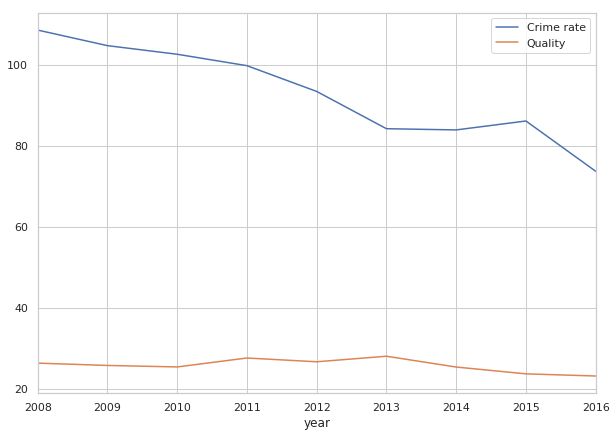

In [0]:
# Activate plot library
%matplotlib inline

data_frame.plot(figsize=(10, 7));

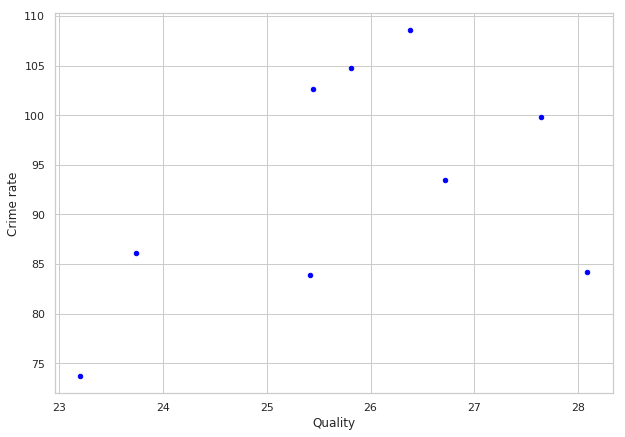

In [0]:
data_frame.plot.scatter('Quality', 'Crime rate', figsize=(10, 7), c='blue');

## Gallery

There are many very good examples on how to use Python to display data:

* Seaborn: https://seaborn.pydata.org/examples/index.html
* Bokeh: https://bokeh.pydata.org/en/latest/docs/gallery.html
  * Market data example: https://demo.bokeh.org/stocks
* Altair: https://altair-viz.github.io/gallery/index.html

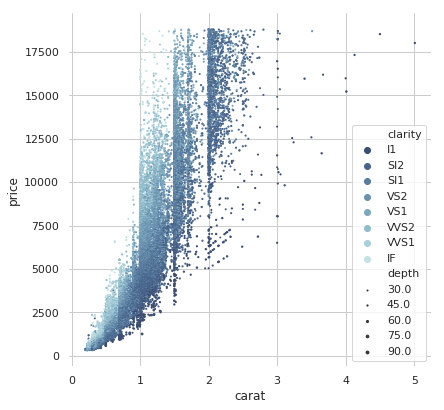

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax);

In [0]:
# load an example dataset
from vega_datasets import data
cars = data.cars()

import altair as alt

interval = alt.selection_interval()

points = alt.Chart(cars).mark_point().encode(
  x='Horsepower',
  y='Miles_per_Gallon',
  color=alt.condition(interval, 'Origin', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(cars).mark_bar().encode(
  x='count()',
  y='Origin',
  color='Origin'
).transform_filter(interval)

points & histogram

VConcatChart({
  data:      Acceleration  Cylinders  Displacement  ...  Origin  Weight_in_lbs       Year
  0            12.0          8         307.0  ...     USA           3504 1970-01-01
  1            11.5          8         350.0  ...     USA           3693 1970-01-01
  2            11.0          8         318.0  ...     USA           3436 1970-01-01
  3            12.0          8         304.0  ...     USA           3433 1970-01-01
  4            10.5          8         302.0  ...     USA           3449 1970-01-01
  5            10.0          8         429.0  ...     USA           4341 1970-01-01
  6             9.0          8         454.0  ...     USA           4354 1970-01-01
  7             8.5          8         440.0  ...     USA           4312 1970-01-01
  8            10.0          8         455.0  ...     USA           4425 1970-01-01
  9             8.5          8         390.0  ...     USA           3850 1970-01-01
  10           17.5          4         133.0  ...  Europe           3090 1970-01-01
  11           11.5          8         350.0  ...     USA           4142 1970-01-01
  12           11.0          8         351.0  ...     USA           4034 1970-01-01
  13           10.5          8         383.0  ...     USA           4166 1970-01-01
  14           11.0          8         360.0  ...     USA           3850 1970-01-01
  15           10.0          8         383.0  ...     USA           3563 1970-01-01
  16            8.0          8         340.0  ...     USA           3609 1970-01-01
  17            8.0          8         302.0  ...     USA           3353 1970-01-01
  18            9.5          8         400.0  ...     USA           3761 1970-01-01
  19           10.0          8         455.0  ...     USA           3086 1970-01-01
  20           15.0          4         113.0  ...   Japan           2372 1970-01-01
  21           15.5          6         198.0  ...     USA           2833 1970-01-01
  22           15.5          6         199.0  ...     USA           2774 1970-01-01
  23           16.0          6         200.0  ...     USA           2587 1970-01-01
  24           14.5          4          97.0  ...   Japan           2130 1970-01-01
  25           20.5          4          97.0  ...  Europe           1835 1970-01-01
  26           17.5          4         110.0  ...  Europe           2672 1970-01-01
  27           14.5          4         107.0  ...  Europe           2430 1970-01-01
  28           17.5          4         104.0  ...  Europe           2375 1970-01-01
  29           12.5          4         121.0  ...  Europe           2234 1970-01-01
  ..            ...        ...           ...  ...     ...            ...        ...
  376          18.6          4         112.0  ...     USA           2640 1982-01-01
  377          18.0          4         112.0  ...     USA           2395 1982-01-01
  378          16.2          4         112.0  ...     USA           2575 1982-01-01
  379          16.0          4         135.0  ...     USA           2525 1982-01-01
  380          18.0          4         151.0  ...     USA           2735 1982-01-01
  381          16.4          4         140.0  ...     USA           2865 1982-01-01
  382          20.5          4         151.0  ...     USA           3035 1982-01-01
  383          15.3          4         105.0  ...  Europe           1980 1982-01-01
  384          18.2          4          91.0  ...   Japan           2025 1982-01-01
  385          17.6          4          91.0  ...   Japan           1970 1982-01-01
  386          14.7          4         105.0  ...     USA           2125 1982-01-01
  387          17.3          4          98.0  ...     USA           2125 1982-01-01
  388          14.5          4         120.0  ...   Japan           2160 1982-01-01
  389          14.5          4         107.0  ...   Japan           2205 1982-01-01
  390          16.9          4         108.0  ...   Japan           2245 1982-01-01
  391          15.0          4 

# Work with unstructured data

Another major advantage of working with Python is the ability to manipulate unstructured data.

This is especially important with machine learning applications since we will have to prepare this unstructured data in order to use it in machine learning models.

## Text

In this exmple, we'll use news from the [20 news groups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). We are looking to understand the top words that characterise a news topic.

(This is inspired by https://gist.github.com/sloria/6407257).

First we install the relevant libraries and load data.

In [0]:
!pip install textblob
!python -m textblob.download_corpora

In [0]:
from sklearn.datasets import fetch_20newsgroups


dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
dataset["data"][0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

We prepare the dataset, for each new group we want to have the content of all news articles.

In [0]:
from textblob import TextBlob as tb

documents = {}
for target_name, document in zip(dataset["target_names"], dataset["data"]):
  documents.setdefault(target_name, [])
  documents[target_name].append(document.lower())

documents = {key: tb(' '.join(value)) for key, value in documents.items()}

We can now compute the [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for each word in each news group and get it's relevance score.

In [0]:
import math

def tf(word, blob):
  return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
  return sum(1 for blob in bloblist if word in blob)

def idf(word, bloblist):
  return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
  return tf(word, blob) * idf(word, bloblist)

bloblist = documents.values()
for group, blob in documents.items():
  print("Top words in document {}".format(group))
  scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
  sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
  for word, score in sorted_words[:5]:
    print("\t{}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document alt.atheism
	pens, TF-IDF: 0.07204
	fans, TF-IDF: 0.02915
	devils, TF-IDF: 0.02915
	jagr, TF-IDF: 0.02915
	season, TF-IDF: 0.02915
Top words in document comp.graphics
	vlb, TF-IDF: 0.07675
	card, TF-IDF: 0.06324
	high-performance, TF-IDF: 0.05756
	video, TF-IDF: 0.05756
	mblawson, TF-IDF: 0.03838
Top words in document comp.os.ms-windows.misc
	armenians, TF-IDF: 0.01988
	armenia, TF-IDF: 0.01966
	weapons, TF-IDF: 0.01966
	turkish, TF-IDF: 0.01638
	announced, TF-IDF: 0.01638
Top words in document comp.sys.ibm.pc.hardware
	bus, TF-IDF: 0.04874
	scsi, TF-IDF: 0.04551
	dma, TF-IDF: 0.04551
	data, TF-IDF: 0.04124
	devices, TF-IDF: 0.03185
Top words in document comp.sys.mac.hardware
	system, TF-IDF: 0.03697
	drive, TF-IDF: 0.03219
	driver, TF-IDF: 0.0307
	jasmine, TF-IDF: 0.0307
	7.0.1, TF-IDF: 0.0307
Top words in document comp.windows.x
	myers, TF-IDF: 0.04345
	tell, TF-IDF: 0.03579
	like, TF-IDF: 0.02616
	cs.unc.edu, TF-IDF: 0.02172
	subliminal, TF-IDF: 0.02172
Top wor

Note that after this simple pre-processing, we obtain structured data since we could store this information in a table. We have for each topic, each word the relevant score of this word in the context of the topic.

## Sound

This example shows how with a few lines of code we can visually understand the difference between the sound of a pigeon and a goose.

Even if this specific example might not be of use for any of us, it is interesting to see how sound data can be prepared to later be used in machine learning models.

### Data prep and import

In [0]:
# Download sounds
!wget http://www.orangefreesounds.com/wp-content/uploads/2019/05/Pigeons-cooing.zip
!wget http://www.orangefreesounds.com/wp-content/uploads/2019/05/Angry-hissing-goose.zip

In [0]:
# Process mp3 to wav files
!unzip -o Pigeons-cooing.zip
!ffmpeg -y -i Pigeons-cooing.mp3 -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav pigeons.wav
!unzip -o Angry-hissing-goose.zip
!ffmpeg -y -i Angry-hissing-goose.mp3 -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav angry.wav

In [0]:
from scipy.io import wavfile

pigeons = wavfile.read("pigeons.wav")
angry_goose = wavfile.read("angry.wav")

### Raw data

If we try to compare both signal in their raw format, it seems impossible to identify which signal comes from which bird.

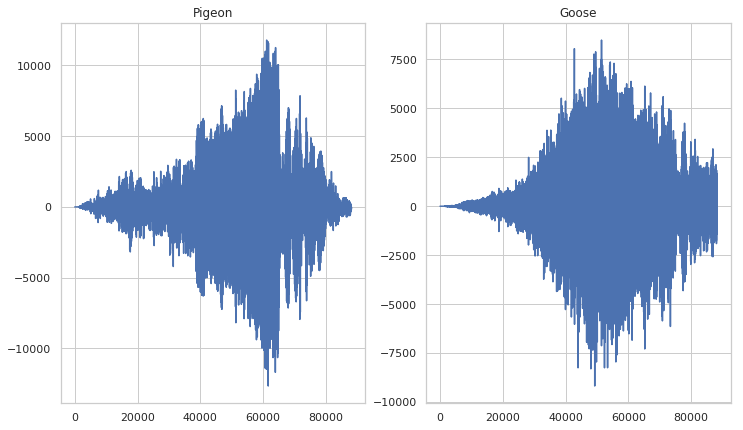

In [0]:
import matplotlib.pyplot as plt
n_samples = 44100*2

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(pigeons[1][:n_samples])
plt.title("Pigeon")
plt.subplot(1, 2, 2)
plt.plot(angry_goose[1][:n_samples])
plt.title("Goose");

### Frequency space

However, once we apply the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) to analyse frequencies instead of time series. It is much clearer than the leave plot is the pigeon (lower frequencies) and the right part the goose (white noise).

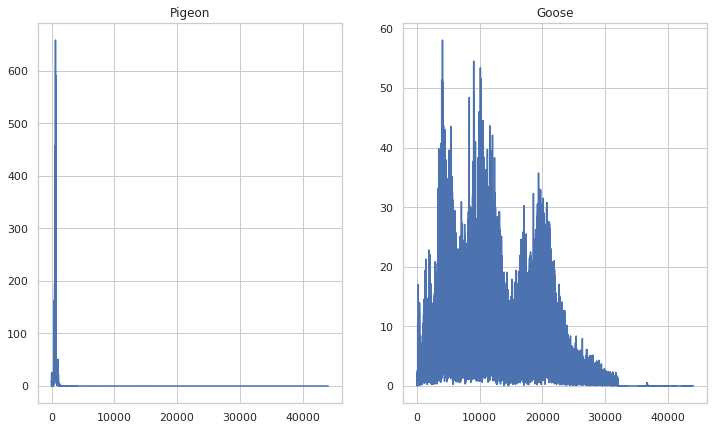

In [0]:
# Fourrier transform
def fourrier_transform(x):
  f = np.fft.fft(x)
  n = len(x)
  return 2/n * np.abs(f[0:np.int(n/2)]) # positive freqs only

pigeons_freq = fourrier_transform(pigeons[1][:n_samples])
angry_goose_freq = fourrier_transform(angry_goose[1][:n_samples])

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(pigeons_freq);
plt.title("Pigeon")
plt.subplot(1, 2, 2)
plt.plot(angry_goose_freq);
plt.title("Goose");

This representation can easily be used to train a machine learning model and detect which birds sings based on an audio recording.

## Images

See previously discussed example on satellite images.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/smassonnet/ml-bootcamp/blob/master/notebooks/Satellite_Images_Kutupalong.ipynb)